# Chaos Game and Attractors

The ideia of this notebook is to define a set of rules that guide the choice os points in order to form interesting patterns.

These points are then plotted to reveal a surprising image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange as rrange, random

# Sierpinski Triangle

In order to draw the Sierpinski triangle, the set of rules to follow is quite simple. 

Start by defining the three vertices of the triangle.
Once that's done, simply choose a starting point randomly on the 2D plane (regardless of whether it's inside or outside of the triangle).

Now, randomly choose a vertex from the triangle (each vertex has the same probability of being chosen) and move to the midpoint between your current position and the newly chosen vertex. This is your new position, save it and repeat the process.

In the end you should get a Sierpisnki triangle.

In [2]:
def randP(poly):
    return poly[rrange(0,len(poly))]

def halfstep(p1, p2):
    return (p1 + p2) / 2.0

def nthstep(p1, p2, n):
    return (p1 + p2) / float(n)

def genPoints(poly, iterations, nth_part=2.0):
    p = np.array([0.0, 0.0])
    steps = []
    for i in range(iterations):
        p = nthstep(p, randP(poly), nth_part)
        steps.append(p)
    return np.array(steps)

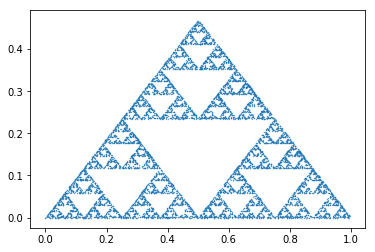

In [3]:
triangle = np.array([[0.0, 0.0], [0.5, 0.47], [1.0, 0.0]])
sierpinski = genPoints(triangle, 10000)

X = sierpinski[:,0]
Y = sierpinski[:,1]

plt.scatter(X, Y, s=0.1)
plt.show()

Awesome! Now let's investigate different parameters affect the overall structure of the drawing.

Let's start with the step size. Originally, the point moved to the midpoint between it's position and a random vertex.
What if the point moves $\frac13$ of the way? Or $\frac14$ of the way? What if it overshoots?

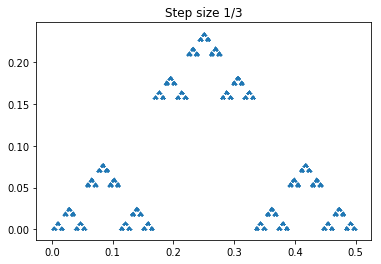

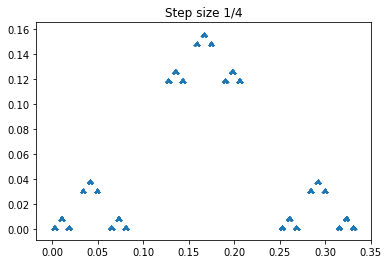

In [5]:
#Experimenting with step_size = 1/3
spierpinski_third = genPoints(triangle, 10000, 3.0)
X_third = spierpinski_third[:,0]
Y_third = spierpinski_third[:,1]

plt.scatter(X_third, Y_third, s=0.1)
plt.title("Step size 1/3")
plt.show()

#Experimenting with step_size = 1/4
spierpinski_fourth = genPoints(triangle, 10000, 4.0)
X_fourth = spierpinski_fourth[:,0]
Y_fourth = spierpinski_fourth[:,1]

plt.scatter(X_fourth, Y_fourth, s=0.1)
plt.title("Step size 1/4")
plt.show()

Hmm, so apparently the step size controls how far apart every sub triangle is from eachother.

If that's the case, then overshooting should bring them close together.

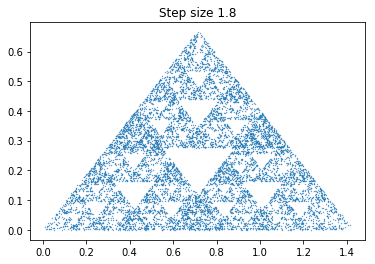

In [9]:
#Experimenting with step_size = 1.8
spierpinski_overshoot = genPoints(triangle, 10000, 1.7)
X_overshoot = spierpinski_overshoot[:,0]
Y_overshoot = spierpinski_overshoot[:,1]

plt.scatter(X_overshoot, Y_overshoot, s=0.1)
plt.title("Step size 1.8")
plt.show()

Just as expected, the sub copies of the structure start to overlap.

Now let's try modifying the base polygon. Can we get more interesting shapes by adding more vertices?

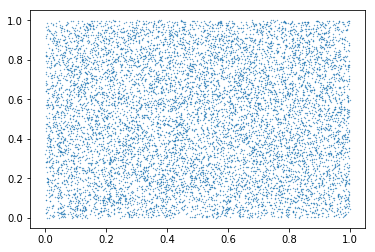

In [14]:
#Experimenting with a square as the base polygon

square = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])

square_fractal = genPoints(square, 10000)
X_square = square_fractal[:,0]
Y_square = square_fractal[:,1]

plt.scatter(X_square, Y_square, s=0.1)
plt.show()

Huh, it seems just like random noise... That's not interesting. But what if we change the step size? Maybe using the midpoint is causing way too much overlap between the structures. Let's try reducing.

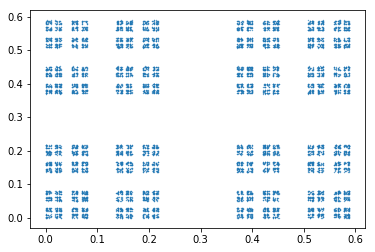

In [20]:
square_fractal_spaced = genPoints(square, 10000, 2.7)
X_square_spaced = square_fractal_spaced[:,0]
Y_square_spaced = square_fractal_spaced[:,1]

plt.scatter(X_square_spaced, Y_square_spaced, s=0.1)
plt.show()

Bingo!

How about a pentagon?

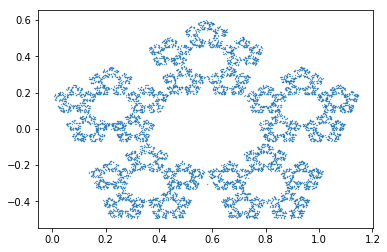

In [43]:
#Experimenting with a pentagon as the base polygon

pentagon = np.array([[0.95, 1.81], [1.9, 0.31], [1.54, -0.81], [0.36, -0.81], [0.0, 0.31]])

pentagon_fractal = genPoints(pentagon, 10000, 2.65)
X_pentagon = pentagon_fractal[:,0]
Y_pentagon = pentagon_fractal[:,1]

plt.scatter(X_pentagon, Y_pentagon, s=0.1)
plt.show()

Sweet! Now, let's try something else.

# Barnsley Fern

Instead of using simple steps based on a single polygon, let's elaborate a little more and attempt to draw a fractal fern!

The set of rules that govern the Barnsley Fern is slightly more complicated. They rely on linear transformations with different probabilities distributed among them.

The set of rules can be summarized by the following functions:

\begin{equation}
    f_1(x,y) = 
        \begin{bmatrix}
            0 & 0 \\
            0 & 0.16
        \end{bmatrix}
        \begin{bmatrix}
            x \\
            y
        \end{bmatrix}
\end{equation}

\begin{equation}
    f_2(x,y) = 
        \begin{bmatrix}
            0.85 & 0.4 \\
            -0.04 & 0.85
        \end{bmatrix}
        \begin{bmatrix}
            x \\
            y
        \end{bmatrix}
        +
        \begin{bmatrix}
            0 \\
            1.6
        \end{bmatrix}      
\end{equation}

\begin{equation}
    f_3(x,y) = 
        \begin{bmatrix}
            0.2 & -0.26 \\
            0.23 & 0.22
        \end{bmatrix}
        \begin{bmatrix}
            x \\
            y
        \end{bmatrix}
        +
        \begin{bmatrix}
            0 \\
            1.6
        \end{bmatrix}      
\end{equation}

\begin{equation}
    f_4(x,y) = 
        \begin{bmatrix}
            -0.15 & -0.28 \\
            0.26 & 0.24
        \end{bmatrix}
        \begin{bmatrix}
            x \\
            y
        \end{bmatrix}
        +
        \begin{bmatrix}
            0 \\
            0.44
        \end{bmatrix}      
\end{equation}


Once again, start with a random point. Then apply one of the above transformations according to the following probabilities:

\begin{equation}
    P[f_1] = 1\%,\\P[f_2] = 85\%,\\P[f_3] = 7\%,\\P[f_4] = 7\%
\end{equation}

Add this new point to the scatter plot and repeat the process. After lots of iterations you should end up with an image that resembles a fern - the Barnsley Fern.

In [32]:
def barnsley_transformations(point, case):
    if case == 0:
        return np.array([[0.0, 0.0], [0.0, 0.16]]).dot(point)
    if case == 1:
        return np.array([[0.85, 0.04], [-0.04, 0.85]]).dot(point) + np.array([0.0, 1.6])
    if case == 2:
        return np.array([[0.2, -0.26], [0.23, 0.22]]).dot(point) + np.array([0.0, 1.6])
    if case == 3:
        return np.array([[-0.15, 0.28], [0.26, 0.24]]).dot(point) + np.array([0.0, 0.44])
    
def rand_transformation(p):
    r = random()
    if r < 0.01:
        return barnsley_transformations(p, 0)
    if r < 0.86:
        return barnsley_transformations(p, 1)
    if r < 0.93:
        return barnsley_transformations(p, 2)
    
    return barnsley_transformations(p, 3)


def gen_fern(iterations):
    p = np.array([0.0, 0.0])
    steps = []
    for i in range(iterations):
        p = rand_transformation(p)
        steps.append(p)
    return np.array(steps)

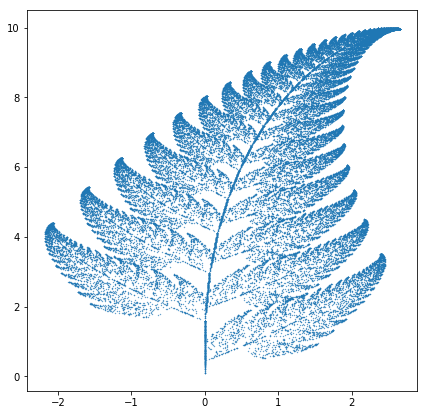

In [40]:
barnsley_fern = gen_fern(50000)

X = barnsley_fern[:, 0]
Y = barnsley_fern[:, 1]

plt.figure(figsize=(7,7))
plt.scatter(X, Y, s=0.1)
plt.show()